**Import the libraries**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Load the dataset**

In [ ]:
df=pd.read_csv("/content/revenue_prediction (3).csv")

In [ ]:
df.head()

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715


**Examining missing values in a dataset**

In [ ]:
df.isnull().sum()

,0
Id,0
Name,0
Franchise,0
Category,0
City,0
No_Of_Item,0
Order_Placed,0
Revenue,0


**Drop irrelevant columns**

In [ ]:
# Dropping columns that are less relevant for this analysis
df = df.drop(columns=['Id', 'Name'])

#from company POV, they measure a course's success by few of it's important features
#   ratings,level,schedule,duration,number of reviews
# other than these, the rest of the features are vague and not much important, hence we drop them from analysis
df

,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,Yes,Mexican,Bengaluru,55,5.5,5953753
1,No,Varied Menu,Gurugram,72,6.8,7223131
2,Yes,Chicken,Pune,25,1.9,2555379
3,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,Yes,Pizza,Noida,48,4.2,4816715
...,...,...,...,...,...,...
95,No,Italian/Pizza,Bengaluru,19,1.1,1270499
96,Yes,Varied Menu,Bengaluru,75,6.3,6412623
97,Yes,Varied Menu,Gurugram,77,6.2,6694797
98,Yes,Sports Bar,Pune,25,2.1,2344689


In [ ]:
cols=list(df.columns)

In [ ]:
from sklearn.preprocessing import LabelEncoder

L1=LabelEncoder()

#create a list of encodable object column names in dataset:
LEcol=[]
for col in cols:
    if (df[col].dtype =="object" ):
        LEcol.append(col)

#create loop for encoding:
for col in LEcol:
    df[col]=L1.fit_transform(df[col])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Franchise     100 non-null    int64  
 1   Category      100 non-null    int64  
 2   City          100 non-null    int64  
 3   No_Of_Item    100 non-null    int64  
 4   Order_Placed  100 non-null    float64
 5   Revenue       100 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 4.8 KB


Feature Selection

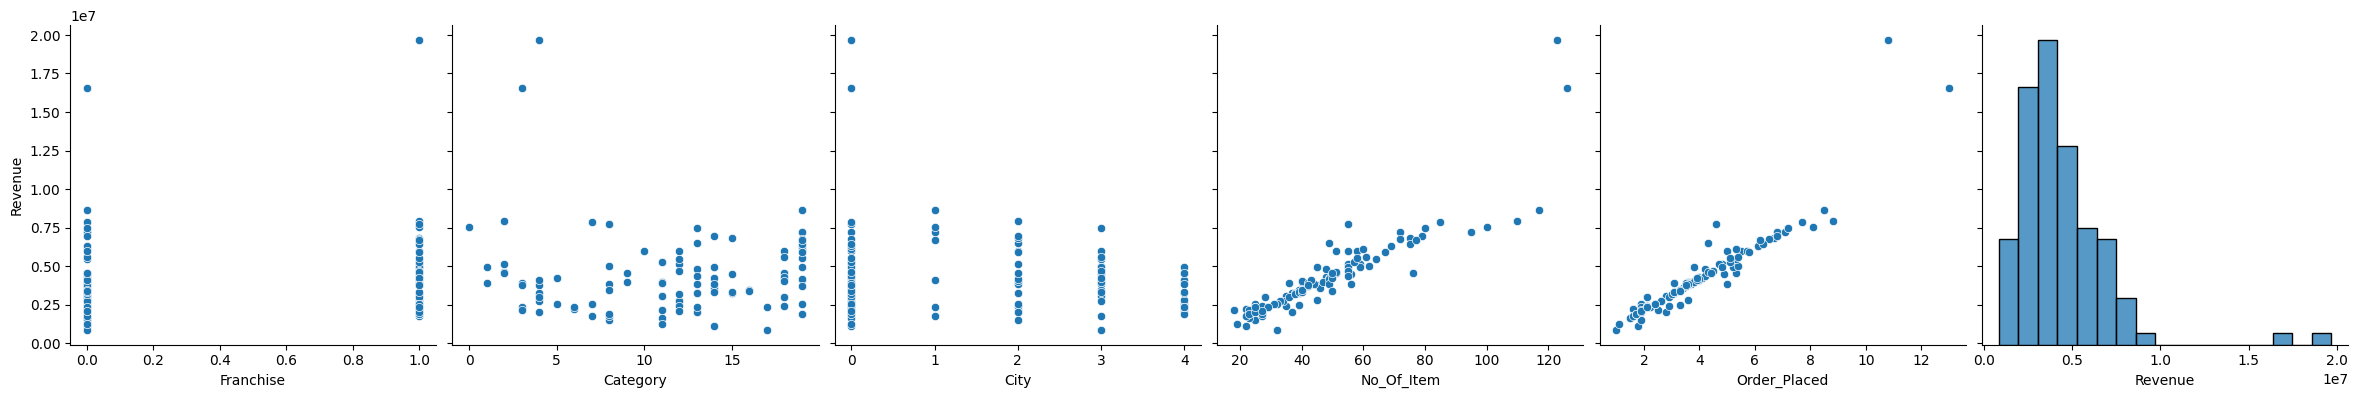

In [ ]:
# 1st way using scatter plot:
import seaborn as sns

sns.pairplot(
    df, x_vars = df.columns , y_vars = "Revenue",
    kind = 'scatter', height = 4
)

**Insights:**

* From, the pairplot,the "No_Of_Item" and "Order_Placed" columns looks much more appropriate for our Linear Regression analysis of Revenue, since the datapoints look bit clustered unlike the "Franchise","Category" and "City" which are grouped

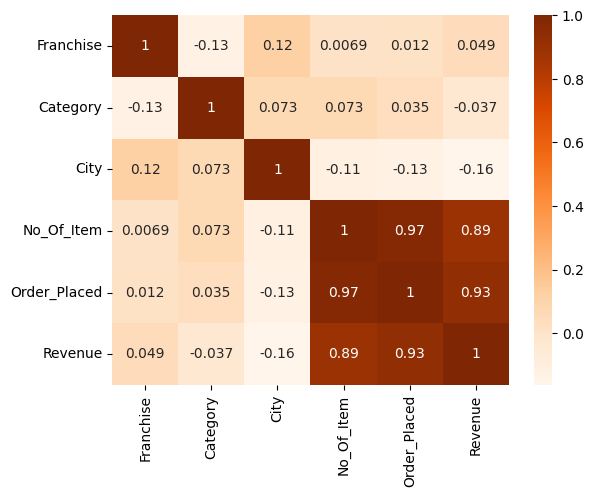

In [ ]:
sns.heatmap(df.corr(), cmap = 'Oranges', annot = True)
plt.show()

**Insights:**

- From, the heatmap,the the "No_Of_Item" and "Order_Placed" columns look much more appropriate for our Linear Regression analysis,since it is the most RELATED column with our target column "Revenue", b'coz the correlation coefficient of 0.89 (almost 0.9) and 0.93 (almost 1).Thus this confirms with the pairplot inference.

- If this inference seems not enough, then we can select the most appropriate columns using LDA or PCA.

In [ ]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
scaler = StandardScaler() # to bring the value in this table in certain range.
columns= ['No_Of_Item', 'Order_Placed',"Revenue"]
df[columns] = scaler.fit_transform(df[columns])

In [ ]:
features=df.drop("Revenue",axis=1)
target=df['Revenue']


,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,1,12,0,0.265962,0.691510,0.588904
1,0,19,1,1.029706,1.327270,1.068530
2,1,5,4,-1.081820,-1.069054,-0.695149
3,1,11,2,-1.396303,-0.775626,-0.838680
4,1,13,3,-0.048520,0.055751,0.159281
...,...,...,...,...,...,...
95,0,11,0,-1.351376,-1.460290,-1.180633
96,1,19,0,1.164484,1.082747,0.762285
97,1,19,1,1.254336,1.033842,0.868902
98,1,17,4,-1.081820,-0.971244,-0.774757


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.85)  # Select 85% variance,and machine suitable selects number of features
Features_pca = pca.fit_transform(features)

Features_pca

array([[  0.49178068],
       [  7.53555886],
       [ -6.45304027],
       [ -0.49877903],
       [  1.54465172],
       [  3.55098357],
       [  6.55134712],
       [  1.52500243],
       [  0.53304989],
       [  6.58374264],
       [ -2.51088106],
       [  1.49035298],
       [ -5.53853555],
       [ -9.50694999],
       [  2.47043532],
       [ -8.51259225],
       [ -7.44679687],
       [-11.4473584 ],
       [  7.57279473],
       [ -3.4839369 ],
       [ -3.44104002],
       [  5.53439832],
       [  2.54114486],
       [  1.52429012],
       [ -9.41924384],
       [  0.57327629],
       [  6.47347276],
       [  7.50283777],
       [ -3.50961415],
       [  0.48636499],
       [  6.46887989],
       [ -5.53574608],
       [ -7.51237981],
       [ -8.49917797],
       [  7.5736683 ],
       [-10.47743586],
       [ -0.46698531],
       [ -7.46551767],
       [  0.56970778],
       [  1.53145495],
       [  3.54774309],
       [ -2.41932064],
       [-10.5062326 ],
       [  0

In [ ]:
x = features["Order_Placed"]


y = target

x = np.array(x).reshape(-1, 1)#use this code ALWAYS (it prevents array dimension error)

In [ ]:
df.shape

(100, 2)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

**Split the dataset into Training set and Test set**

In [ ]:
print(y_train)

[ 6941173  2025297  2967425  4952255  3452382  3918918  6836483  6412623
  4544227  2525375  3861370  7865428  7495092  7705945  3410878  4517319
  1882131  1756069  3903884 19696939  8630682  4100886  6491607  1270499
  6135276  1521934  4066618  2778621  5286212  5107746  7904084  2175511
  7513524  5461700  5152497  3871344  5966635  2551252  3028267  2364478
  2390534  4567678  4651866  2732645  2156098  4052733  4250758  3836721
  4350573  6694797  6313221  4554237  3004429  7201784  2344689  3258837
 16549064  3261924  3753720  3600467  1619683  4250553  2740687  2447890
  7223131  1763231   849870  2555379  1999068  5906596  2083447  5500818
  3351383  3807496  5025735  3164972  4136425  1099097  6782425  3273041]


In [ ]:
print(y_test)

[5966193 5595267 3982767 3752885 4264176 3818055 4956086 3727364 3945135
 5953753 4937526 2408199 3347767 2371202 3426169 4816715 4590423 1904842
 2234634 2358644]


**Training the Simple Linear Regression model on the Training set**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

**Predicting the Test set results**

In [ ]:
y_pred=regressor.predict(x_test)

In [ ]:
y_pred

array([ 0.76481801,  0.62297097, -0.13354658, -0.22811127, -0.03898189,
       -0.18082893, -0.13354658, -0.27539362, -0.22811127,  0.67025331,
        0.52840627, -0.5590877 , -0.46452301, -0.89006413, -0.36995831,
        0.05558281,  0.10286515, -1.12647586, -1.17375821, -1.03191117,
        1.28492382, -1.03191117, -0.93734647,  0.33927689, -0.36995831,
       -0.46452301,  1.23764147,  1.04851209,  0.57568862, -0.79549943])

**Accuracy of the Model**

In [ ]:
pred_data = pd.DataFrame(columns = ['Actual Data', 'Predictions', "Error"])
pred_data

,Actual Data,Predictions,Error


In [ ]:
#filling the error details:

pred_data["Actual Data"] = y_test

pred_data['Predictions'] = y_pred

pred_data['Error'] = pred_data['Actual Data'] - pred_data['Predictions']

pred_data

,Actual Data,Predictions,Error
83,0.593604,0.764818,-0.171214
53,0.453452,0.622971,-0.169519
70,-0.155820,-0.133547,-0.022274
45,-0.242680,-0.228111,-0.014568
44,-0.049492,-0.038982,-0.010510
39,-0.218056,-0.180829,-0.037227
22,0.211942,-0.133547,0.345488
80,-0.252323,-0.275394,0.023071
10,-0.170039,-0.228111,0.058072
0,0.588904,0.670253,-0.081350


In [ ]:
def model_evaluation(actData, predData):

  # calculate the r2score
  print(f'R2Score: {r2_score(actData, predData)}')

  # calculate MSE
  a = mean_squared_error(actData, predData)
  print(f'MSE: {a}')

  # calculate the RMSE
  print(f'RMSE Value: {np.sqrt(a)}')

  # calculate MAE
  print(f'MAE Value: {mean_absolute_error(actData, predData)}')

In [ ]:
from sklearn.metrics import *
model_evaluation(y_test, y_pred)

R2Score: 0.8335958336627709
MSE: 0.04775079203763601
RMSE Value: 0.21851954612262037
MAE Value: 0.16929066312702662
